In [1]:
import GAN.cms_datasets as cms

In [2]:
data,mc = cms.load_zee("moriond_v9","abs(ScEta) < 1.5")


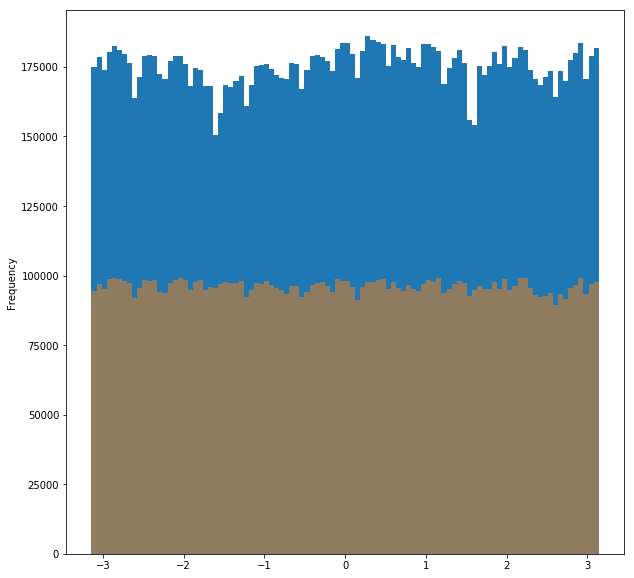

In [3]:
data.Phi.plot.hist(bins=100)
mc.Phi.plot.hist(bins=100,alpha=0.5)

In [4]:
def plot_hist2d(df,x,y, bins=50, norm_by_slice=True, **kwargs):
    values, bins_x, bins_y, _ = plt.hist2d(df[x], df[y], bins=bins, **kwargs)
    plt.show()
    if norm_by_slice:
        norm = values.sum(axis=1)
        normed = values / norm[:,np.newaxis]
        plt.imshow(normed.T)
        plt.xticks( range(bins_x.shape[0]), bins_x )
        plt.yticks( range(bins_y.shape[0]), bins_y )
        return values,norm, bins_x, bins_y
    return norm, bins_x, bins_y


In [5]:
bound = np.abs(mc.ScEta).min()
print(bound)

6.08037e-08


In [6]:
data['OffScEta'] = (np.abs(data.ScEta) - bound)*np.sign(data.ScEta)
mc['OffScEta'] = (np.abs(mc.ScEta) - bound)*np.sign(mc.ScEta)

In [7]:
df = data.loc[:1000000]


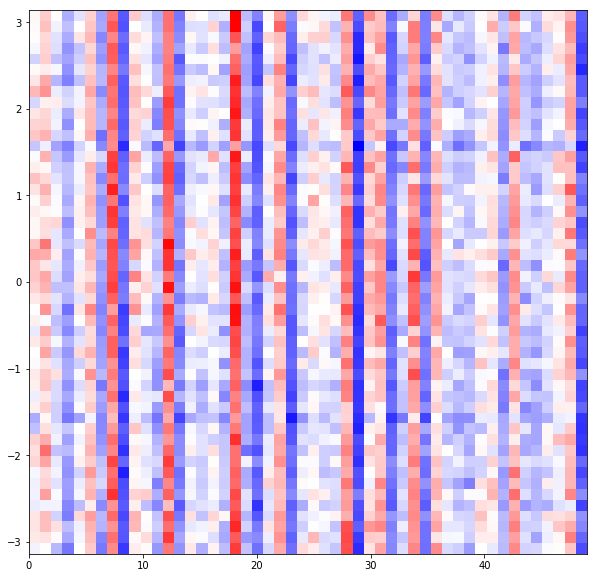

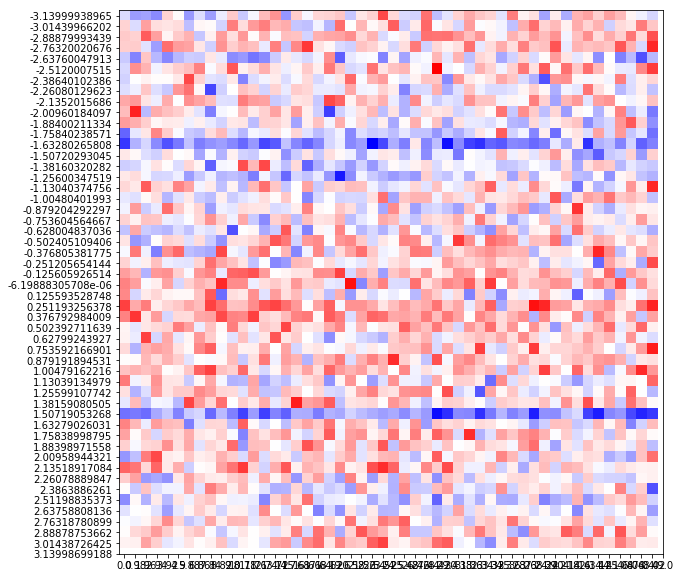

In [8]:
plot_hist2d(df,'run_quantile','Phi');

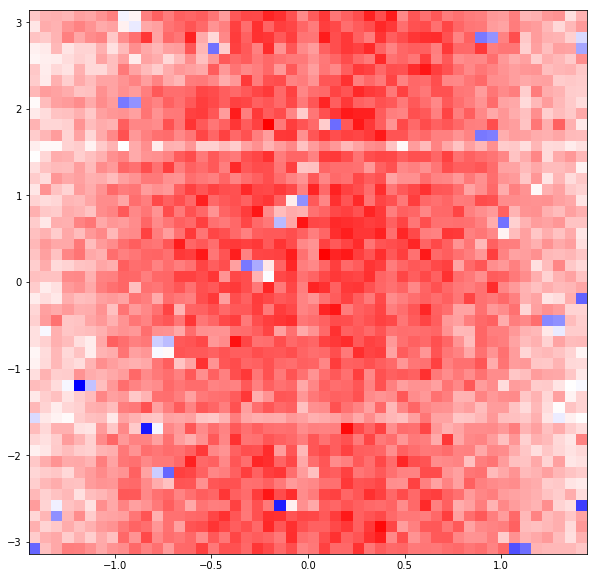

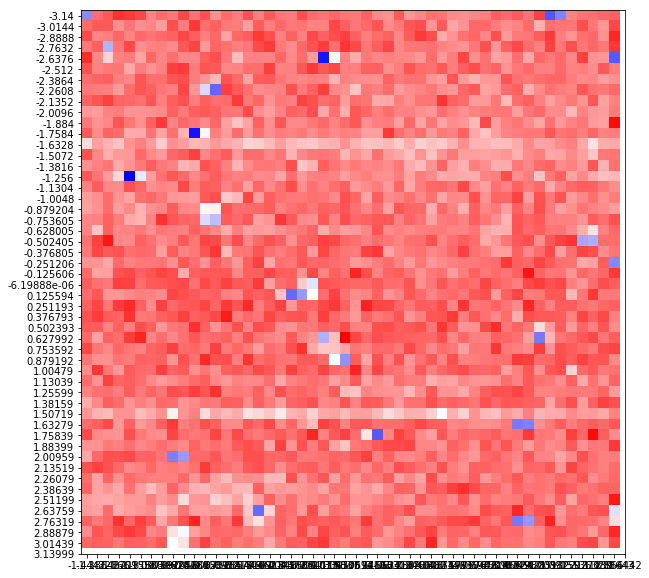

In [9]:
plot_hist2d(df,'OffScEta','Phi');

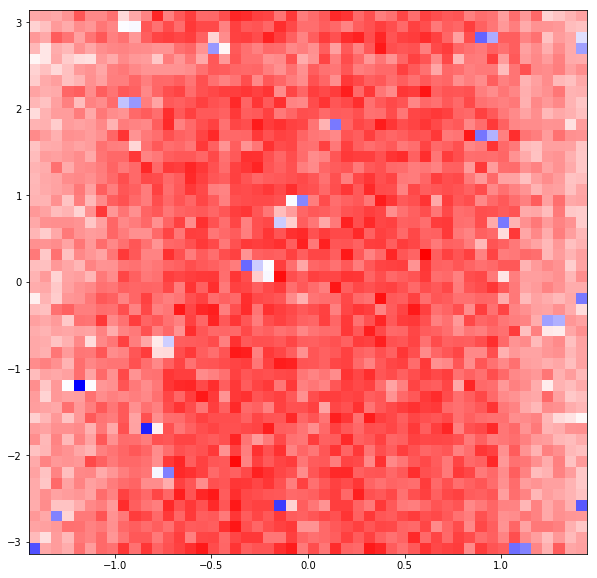

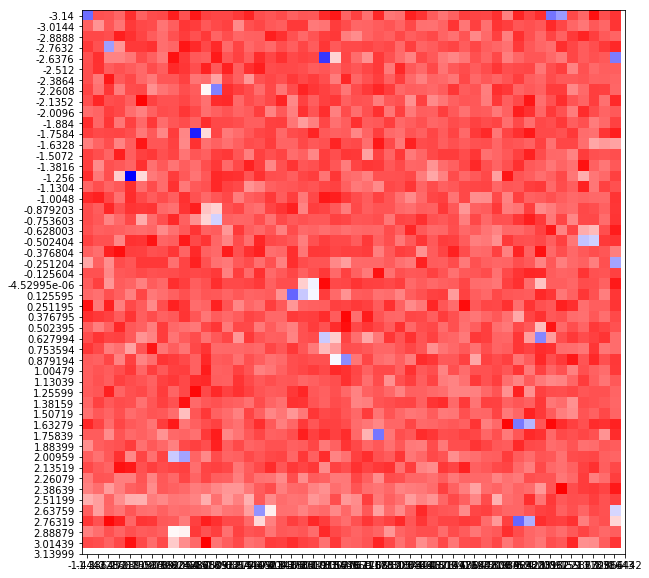

In [10]:
plot_hist2d(mc.loc[:1000000],'OffScEta','Phi');

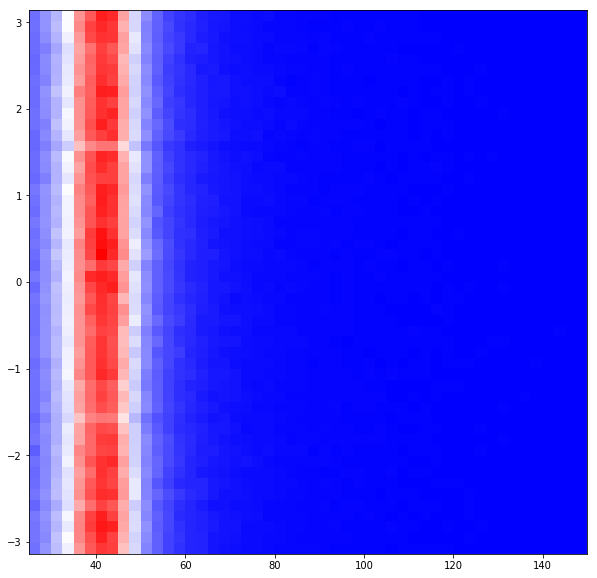

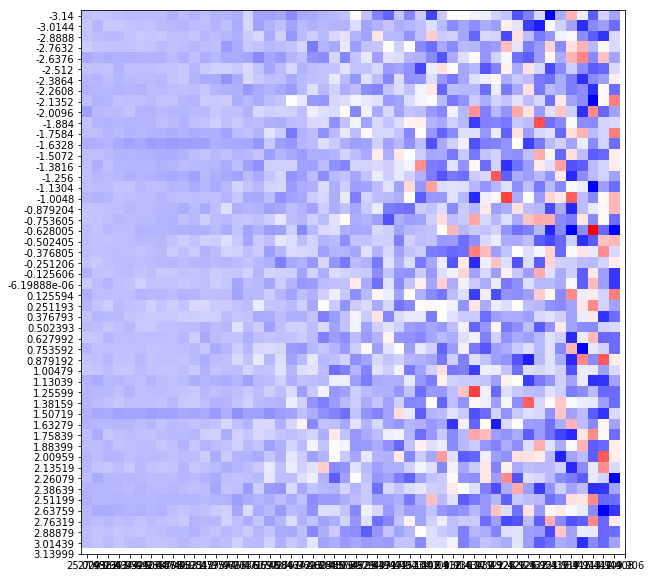

In [11]:
plot_hist2d(df,'Pt','Phi');

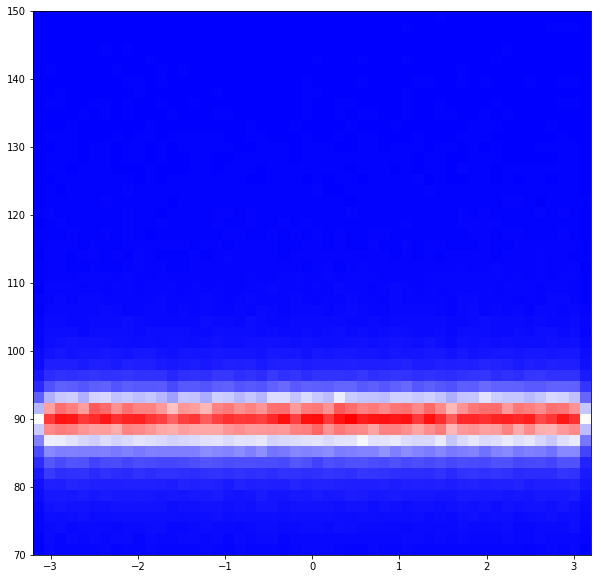

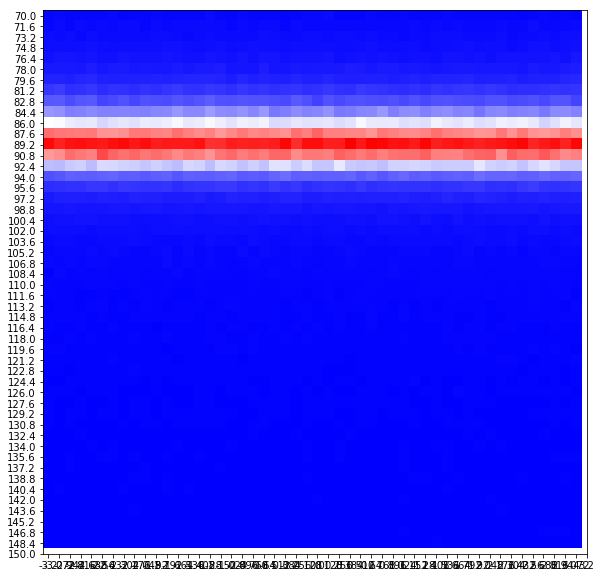

In [12]:
plot_hist2d(df,'Phi','mass',range=[ [-3.2,3.2], [70,150] ]);

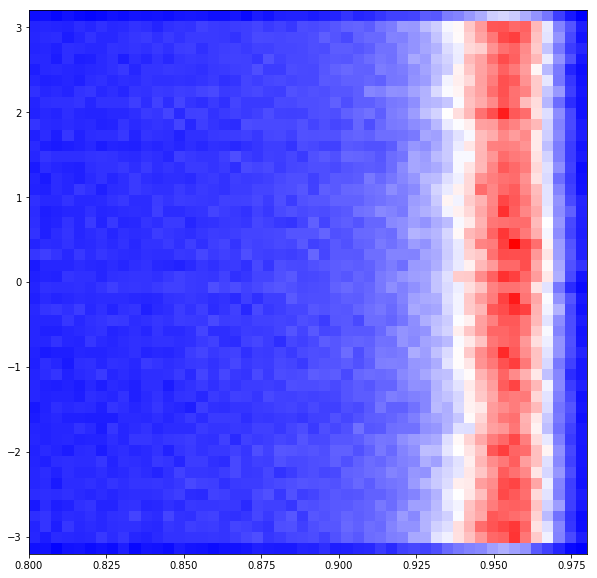

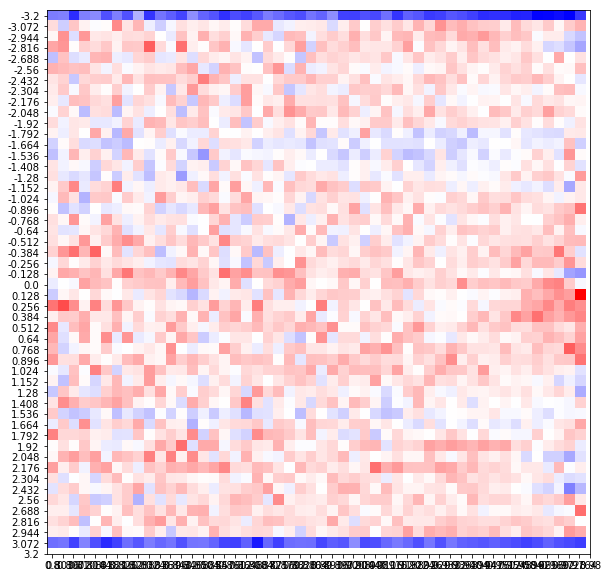

In [13]:
plot_hist2d(df,'R9','Phi',range=[ [0.8,0.98], [-3.2,3.2] ]);

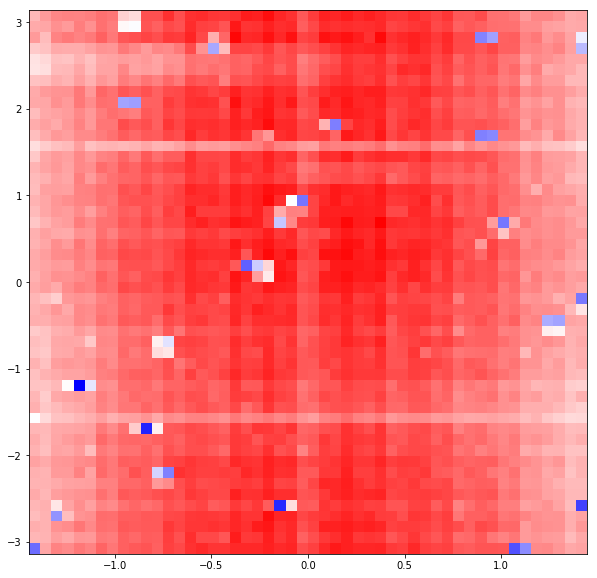

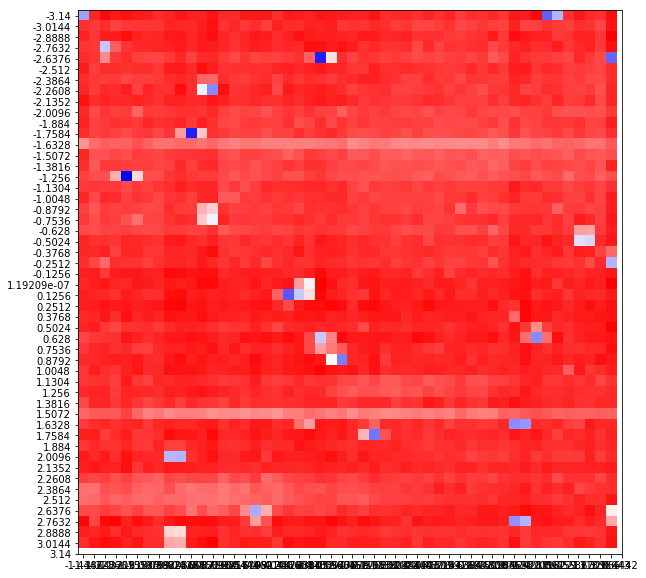

In [14]:
values_data, normed_data, bins_x, bins_y = plot_hist2d(data,'OffScEta','Phi',bins=50)

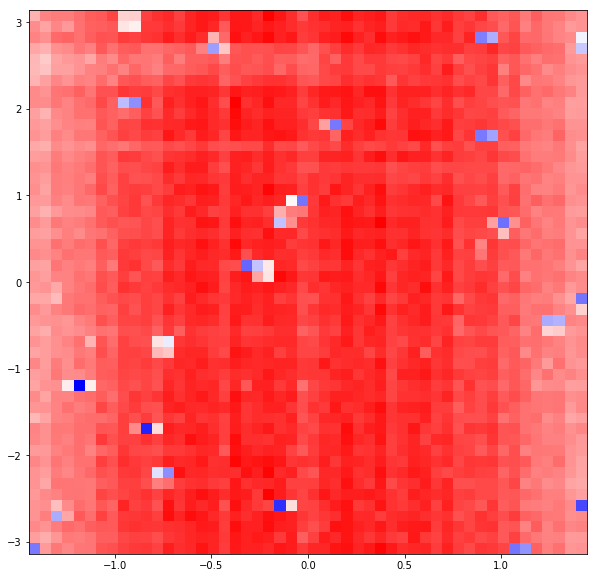

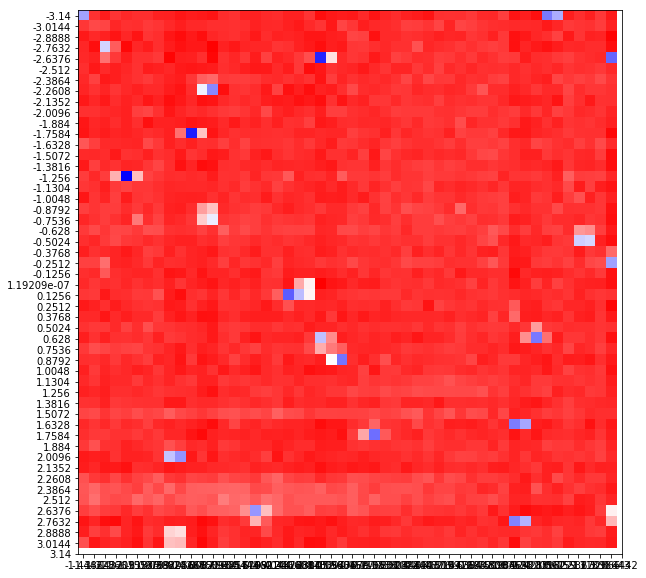

In [15]:
values_mc, normed_mc, bins_x, bins_y = plot_hist2d(mc,'OffScEta','Phi',bins=[bins_x,bins_y])

In [16]:
weights = values_data / values_mc * values_mc.sum() / values_data.sum()

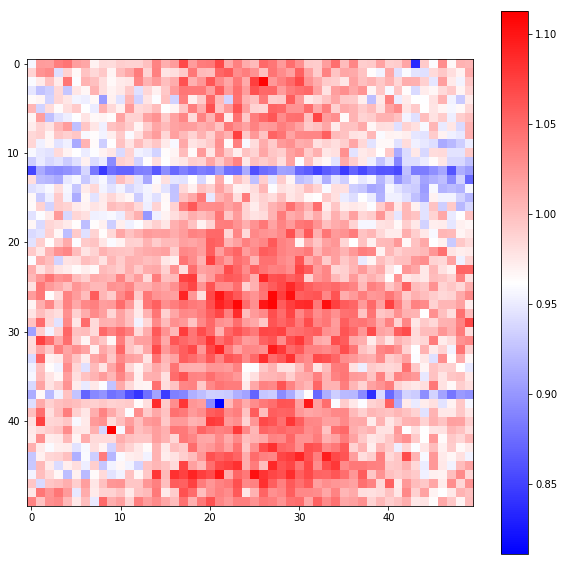

In [17]:
plt.imshow(weights.T)
plt.colorbar()

In [18]:
mc['ScEtaBin'] = pd.cut( mc['OffScEta'], bins_x, labels=range(bins_x.shape[0]-1) ).astype(np.int)
mc['PhiBin'] = pd.cut( mc['Phi'], bins_y, labels=range(bins_x.shape[0]-1) ).astype(np.int)

In [69]:
def rewei_2D(x):
    xbin = max(0,min(weights.shape[0]-1,x[0]))
    ybin = max(0,min(weights.shape[1]-1,x[1]))
    return weights[xbin,ybin]
    print(x,ret)

def rewei_1D(x):
    xbin = max(0,min(weights.shape[0]-1,x[0]))
    return weights_Pt[xbin]
    print(x,ret)



In [19]:
mc['rewei2'] = mc[ ['ScEtaBin','PhiBin'] ].apply( rewei_2D, raw=True, axis=1 )

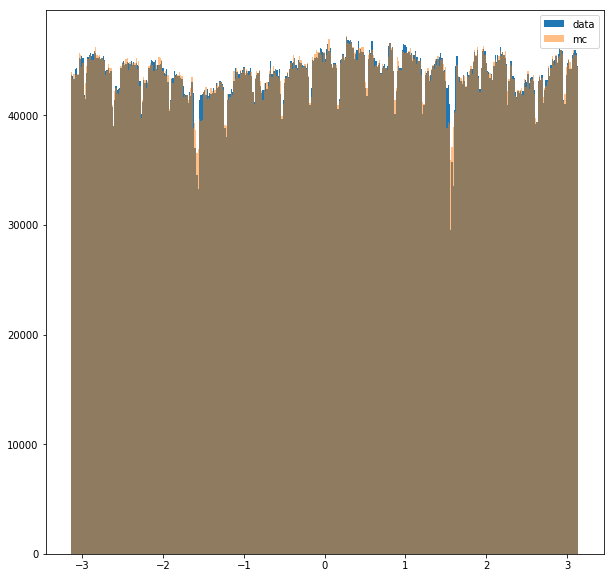

In [20]:
plt.hist(data.Phi, bins=400, label='data');
plt.hist(mc.Phi, weights=mc.rewei2.values*data.shape[0]/mc.shape[0], bins=400, alpha=0.5, label='mc');
plt.legend()


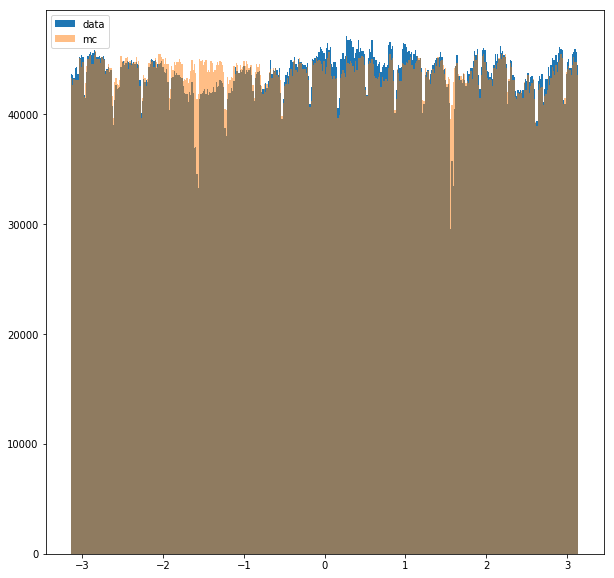

In [21]:
plt.hist(data.Phi, bins=400, label='data');
plt.hist(mc.Phi, weights=np.ones_like(mc.rewei2.values)*data.shape[0]/mc.shape[0], bins=400, alpha=0.5, label='mc');
plt.legend()


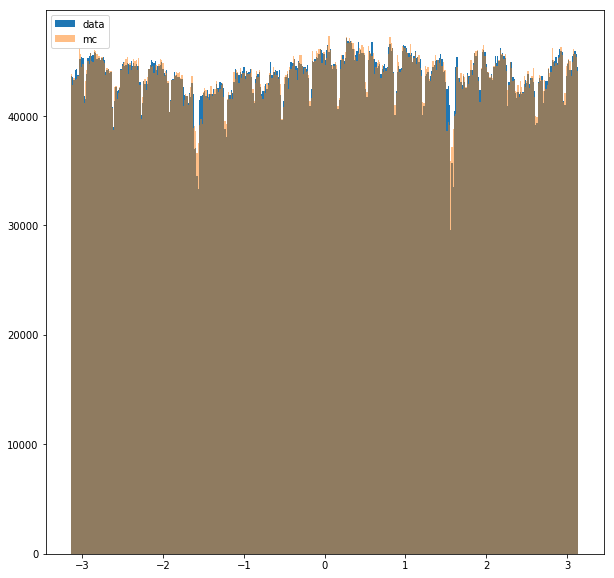

In [22]:
plt.hist(data.Phi, bins=400, label='data');
plt.hist(mc.Phi, weights=mc.rewei2.values*mc.weight.values*data.shape[0]/(mc.weight.values.sum()), bins=400, alpha=0.5, label='mc');
plt.legend()


In [23]:
# np.save('rewei_zee_barrel.npy', [['ScEta','Phi'],weights,bins_x,bins_y])

In [24]:
co = slice(*[0,1])
weights[ co ]

array([[ 0.95671591,  0.98707007,  0.95889706,  0.94749622,  0.96572019,
         1.00549614,  0.96883435,  0.97346986,  0.98534815,  0.98600675,
         0.95750123,  0.93308231,  0.85342533,  0.98153645,  0.94377191,
         0.96685569,  0.96550991,  0.94560169,  0.96764984,  0.94069538,
         0.94494011,  0.99333917,  0.95985915,  1.00953358,  1.00357226,
         0.9806455 ,  1.02087074,  0.96809668,  0.97754227,  0.99854527,
         0.90767799,  0.98341428,  0.98447306,  0.94009047,  0.95294835,
         0.95732978,  0.93862231,  0.9128579 ,  0.94284559,  1.00075883,
         0.98055028,  0.97561207,  0.97303521,  1.00907781,  0.92817834,
         0.92988218,  0.95529329,  0.99619032,  0.97678653,  1.0362254 ]])

In [25]:
a = [0,1]
weights[tuple(a)]

0.98707006732022295

In [26]:
# np.load('rewei_zee_barrel.npy')

In [27]:
def discretize(df,col,bounds):
    cmin = np.abs( df[col] ).min()
    return pd.cut( (np.abs(df[col])-cmin)*np.sign(df[col]),
                   bounds, labels=range(bounds.shape[0]-1) ).astype(np.int)


In [312]:
ptOff = mc.Pt.min()

In [313]:
data['PtOff'] = data.Pt - ptOff
mc['PtOff'] = mc.Pt - ptOff

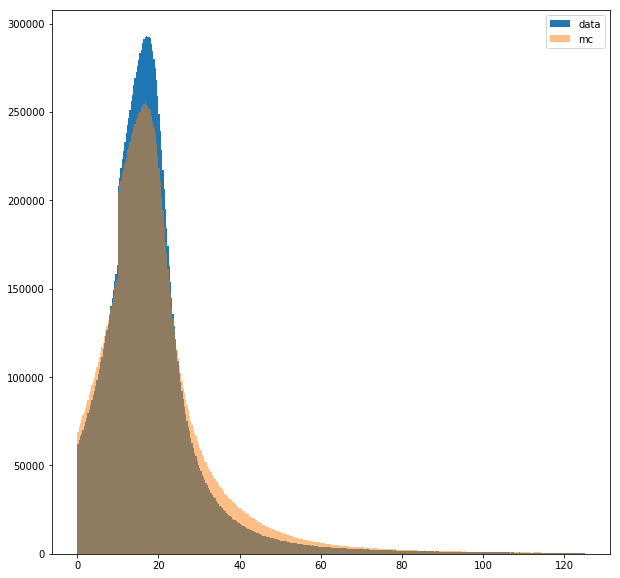

In [314]:
plt.hist(data.PtOff, bins=400, label='data');
plt.hist(mc.PtOff, weights=np.ones_like(mc.rewei2.values)*data.shape[0]/mc.shape[0], bins=400, alpha=0.5, label='mc');
plt.legend()


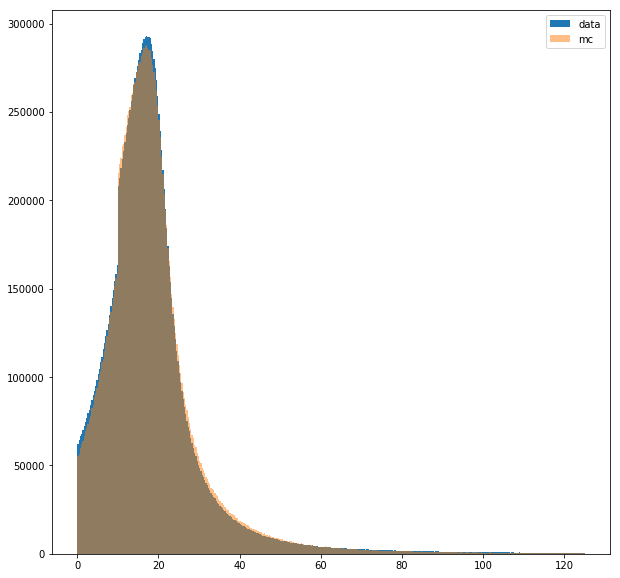

In [315]:
plt.hist(data.PtOff, bins=400, label='data');
plt.hist(mc.PtOff, weights=mc.weight.values*data.shape[0]/mc.weight.sum(), bins=400, alpha=0.5, label='mc');
plt.legend()


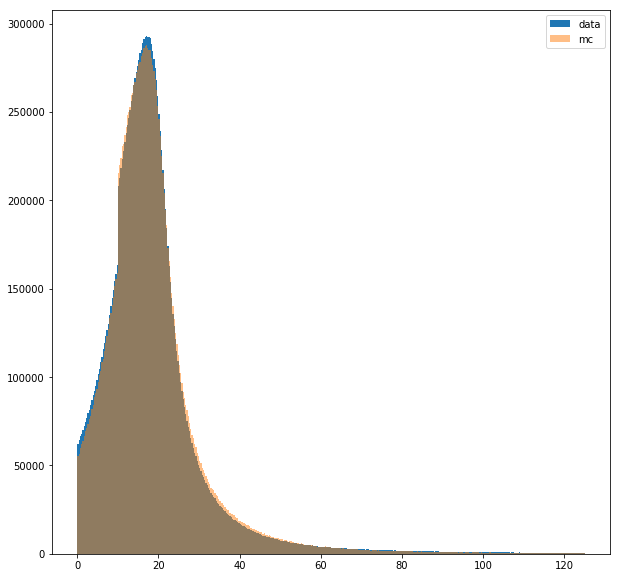

In [316]:
plt.hist(data.PtOff, bins=400, label='data');
plt.hist(mc.PtOff, weights=mc.rewei2.values*mc.weight.values*data.shape[0]/(mc.weight.values.sum()), bins=400, alpha=0.5, label='mc');
plt.legend()


In [440]:
bins_Pt = np.hstack([np.linspace(25,50,31), np.linspace(50.5,80,10),np.linspace(81,160,10)]) - ptOff
data_Pt, bins_Pt = np.histogram(data.PtOff,bins=bins_Pt)
mc_Pt, _ = np.histogram(mc.PtOff,bins=bins_Pt,weights=mc.rewei2.values*np.abs(mc.weight.values)*data.shape[0]/(np.abs(mc.weight.values).sum()))


In [441]:
weights_Pt = data_Pt / mc_Pt

/users/musella/my-env/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


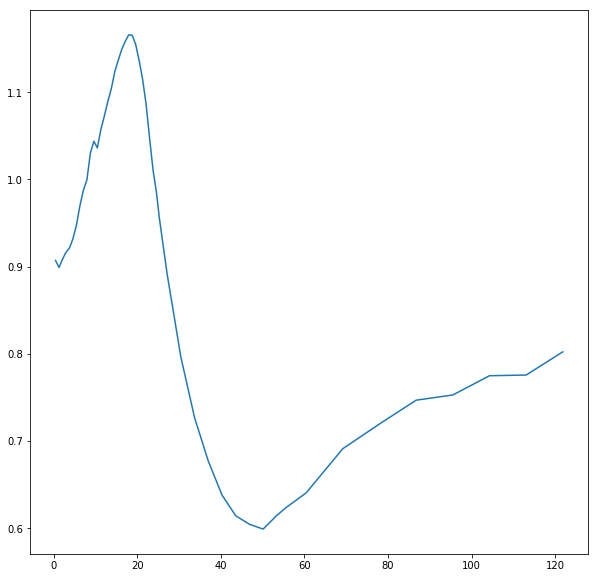

In [442]:
plt.plot(0.5*(bins_Pt[1:]+bins_Pt[:-1]),weights_Pt)

In [443]:
mc['PtBin'] = pd.cut( mc['PtOff'], bins_Pt, labels=range(bins_Pt.shape[0]-1) ).astype(np.int)

In [444]:
mc['reweiPt'] = mc[ ['PtBin'] ].apply( rewei_1D, raw=True, axis=1 )

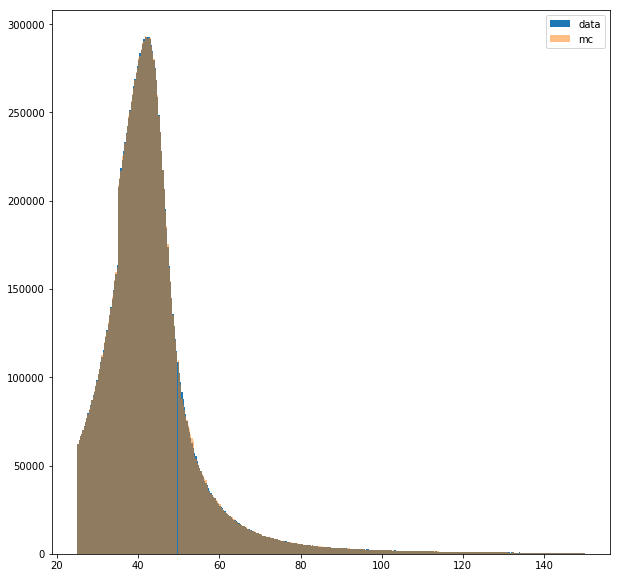

In [445]:
plt.hist(data.Pt, bins=400, label='data');
plt.hist(mc.Pt, weights=mc.reweiPt*mc.rewei2.values*np.abs(mc.weight.values)*data.shape[0]/(np.abs(mc.weight.values).sum()), bins=400, alpha=0.5, label='mc');
plt.legend()


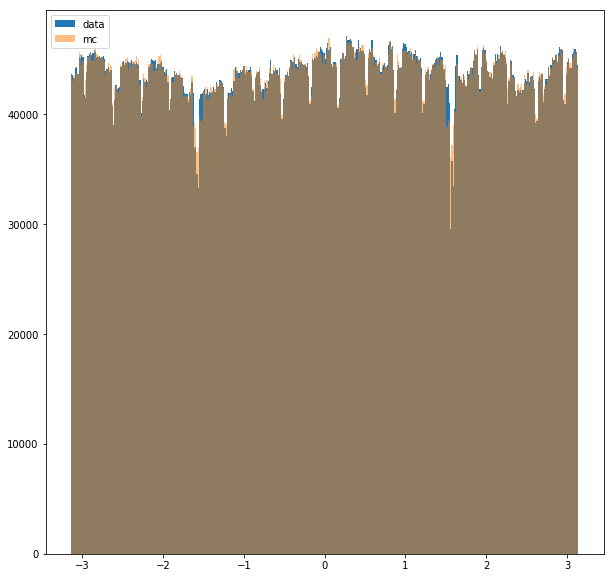

In [446]:
plt.hist(data.Phi, bins=400, label='data');
plt.hist(mc.Phi, weights=mc.rewei2.values*np.abs(mc.weight.values)*data.shape[0]/(np.abs(mc.weight.values).sum()), bins=400, alpha=0.5, label='mc');
plt.legend()


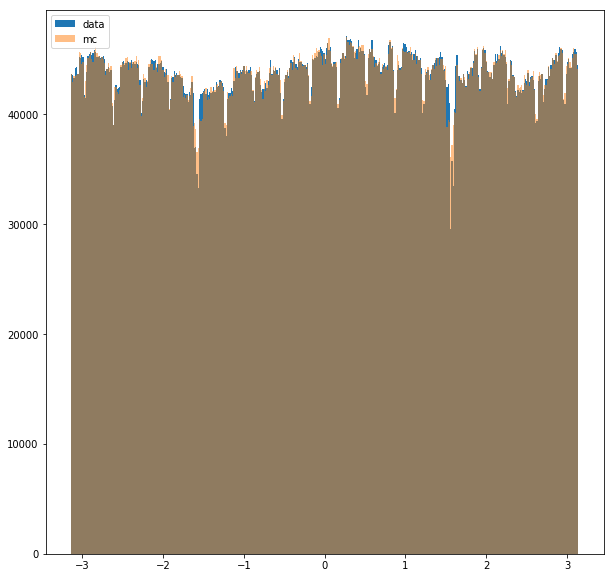

In [447]:
plt.hist(data.Phi, bins=400, label='data');
plt.hist(mc.Phi, weights=mc.reweiPt*mc.rewei2.values*np.abs(mc.weight.values)*data.shape[0]/(np.abs(mc.weight.values).sum()), bins=400, alpha=0.5, label='mc');
plt.legend()


In [448]:
np.save('rewei_zee_pt_abs_barrel.npy', [['Pt'],weights_Pt,bins_Pt])

In [326]:
# time_bins = np.percentile(data.run,np.linspace(0.,100.,30))
# time_bins[0] -= 1
# time_bins[-1] += 1


In [327]:
# time = data.run_quantile.unique()
# time.sort()

In [328]:
# time_dist, time_bins = np.histogram(data.run_quantile,bins=np.linspace(-1.,time.max()+1.,time.shape[0]//2+1))

In [329]:
# # plt.scatter(time,time_dist)

# time_dist, time_bins = np.histogram(data.run,bins=time_bins)

In [330]:
# plt.bar(  time_bins[:-1], time_dist, width=time_bins[1:] - time_bins[:-1],ls="-",fill=False, yerr=np.sqrt(time_dist)  )

In [353]:
runOff = data['run'].min()
rhoOff = mc['rho'].min()

data['runOff'] = data['run'] - runOff
mc['rhoOff'] = mc['rho'] - rhoOff
data['rhoOff'] = data['rho'] - rhoOff

In [331]:
# plt.bar(  np.linspace(0,time_bins.shape[0],time_bins.shape[0]-1), time_dist, fill=False, yerr=np.sqrt(time_dist)  )

In [354]:
mc['runOff'] = data['runOff'].sample(mc.shape[0]).values

In [355]:
# mc['time'] = np.apply_along_axis(np.argmax,1,np.random.multinomial( 1,time_dist/time_dist.sum(), mc.shape[0] ))

In [356]:
# data['time'] = pd.cut(data['run'],time_bins,labels=np.arange(0,time_bins.shape[0]-1)).astype(np.float)

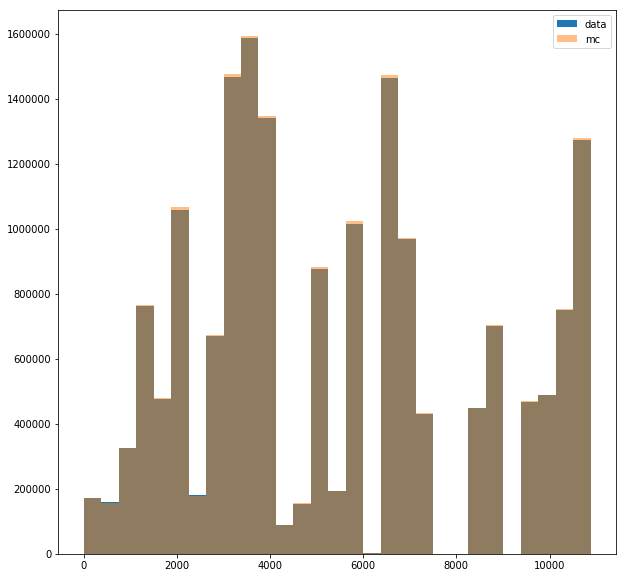

In [357]:
plt.hist(data.runOff, bins=29, label='data');
plt.hist(mc.runOff, bins=29, weights=mc.reweiPt*mc.rewei2.values*mc.weight.values*data.shape[0]/(mc.weight.values.sum()), alpha=0.5, label='mc');
plt.legend()


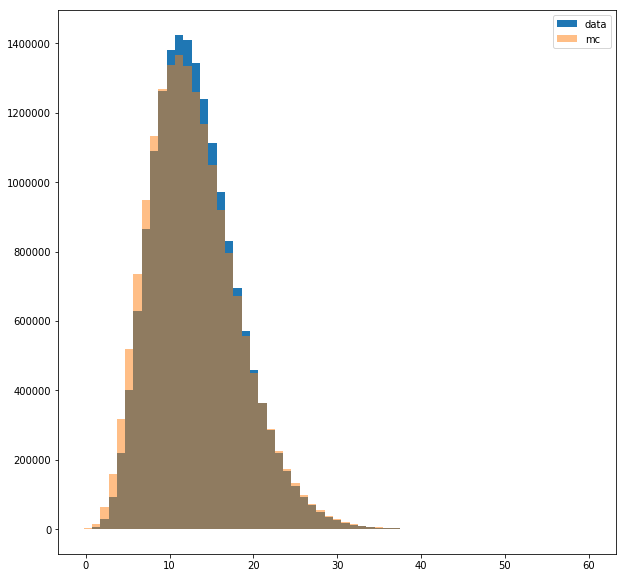

In [358]:
plt.hist(data.rhoOff, bins=61, range=[-0.25,60.25], label='data');
plt.hist(mc.rhoOff, bins=61, range=[-0.25,60.25], weights=mc.reweiPt*mc.rewei2.values*mc.weight.values*data.shape[0]/(mc.weight.values.sum()), alpha=0.5, label='mc');
plt.legend()


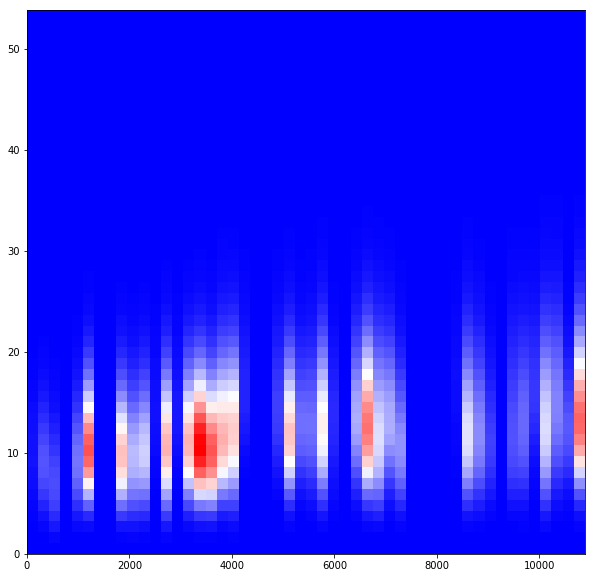

/users/musella/my-env/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


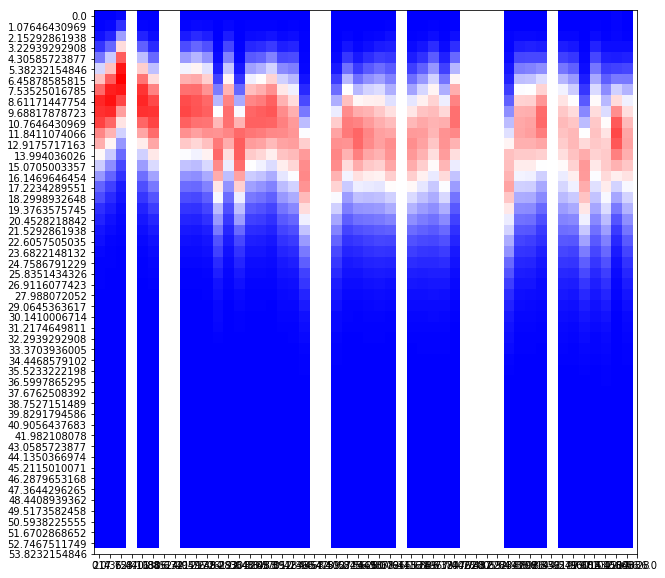

In [359]:
values_data, normed_data, bins_x, bins_y = plot_hist2d(data,'runOff','rhoOff', bins=50);

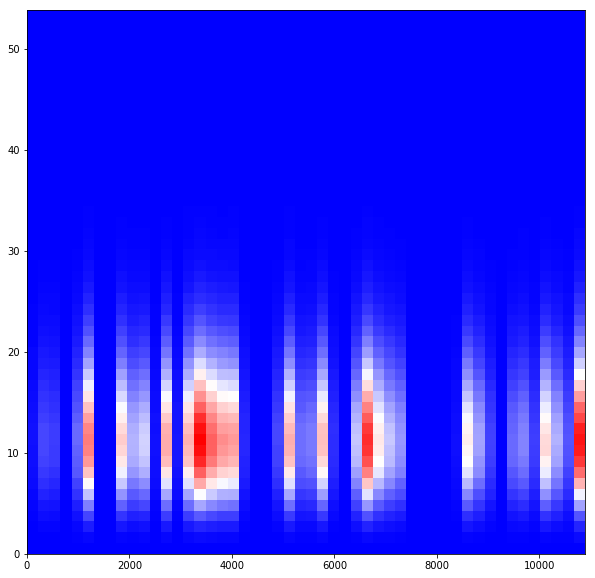

/users/musella/my-env/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


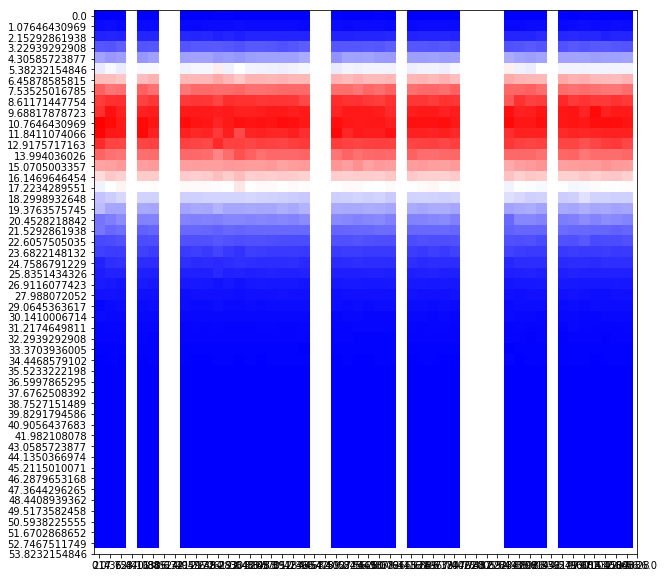

In [390]:
values_mc, normed_mc, bins_x, bins_y = plot_hist2d(mc,'runOff','rhoOff', bins=[bins_x,bins_y], weights=mc.weight);

In [399]:
weights = values_data / values_mc * values_mc.sum() / values_data.sum()

/users/musella/my-env/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/users/musella/my-env/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [400]:
weights[ np.isnan(weights) ] = 0.
weights[ np.isinf(weights) ] = 0.
weights[ weights>20 ] = 20.

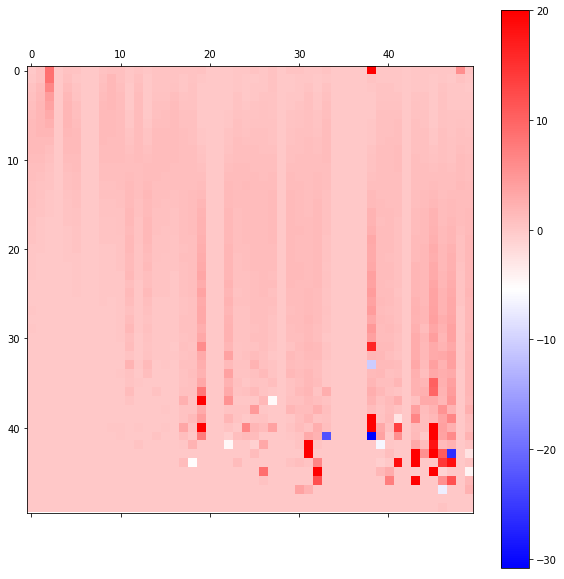

In [401]:
plt.matshow(weights.T)
plt.colorbar()

In [403]:
np.save('rewei_zee_pu_barrel.npy', [['run','rho'],weights,bins_x,bins_y])

In [404]:
import GAN.preprocessing as preprocessing

In [405]:
mc['reweiPu'] = preprocessing.reweight(mc,['run','rho'],[bins_x,bins_y],weights = weights)

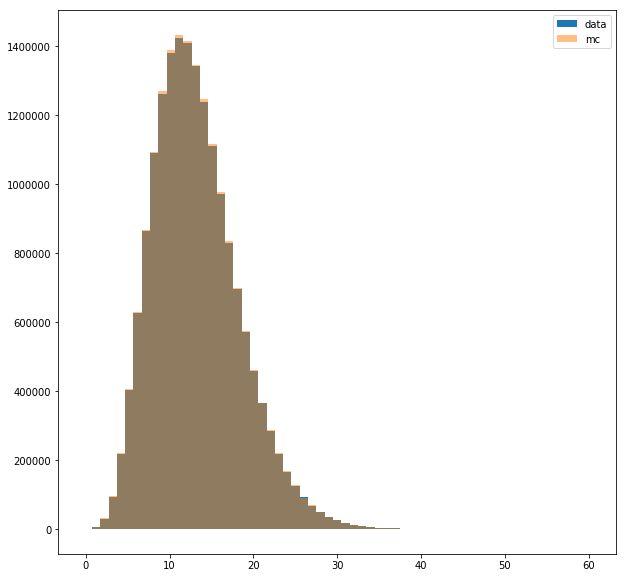

In [411]:
plt.hist(data.rho, bins=61, range=[-0.25,60.25], label='data');
plt.hist(mc.rho, bins=61, range=[-0.25,60.25], weights=mc.reweiPu*mc.reweiPt*mc.rewei2*mc.weight*data.shape[0]/(mc.weight.values.sum()), alpha=0.5, label='mc');
plt.legend()


In [412]:
# plt.hist2d(mc.runOff,mc.rhoOff, bins=[bins_x,bins_y]);#,weights=mc.reweiPu);

In [413]:
# weights

In [414]:
# #plt.hist(data.rho, bins=61, range=[-0.25,60.25], label='data');
# plt.hist(mc.rho, bins=61, range=[-0.25,60.25], alpha=0.5, label='unwei');

# plt.hist(mc.rho, bins=61, range=[-0.25,60.25], weights=mc.reweiPu, alpha=0.5, label='wei');
# plt.legend()


In [417]:
# mc.weight.max()

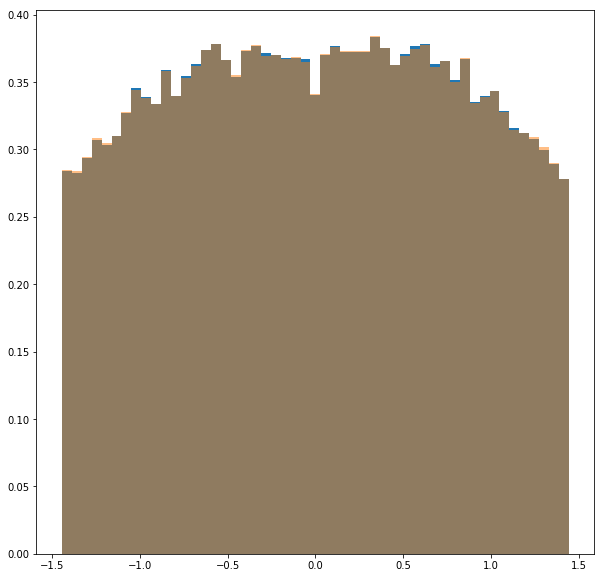

In [423]:
plt.hist(mc.ScEta,weights=mc.weight,bins=51,normed=True);
plt.hist(mc.ScEta,weights=np.abs(mc.weight),alpha=0.5,bins=51,normed=True);


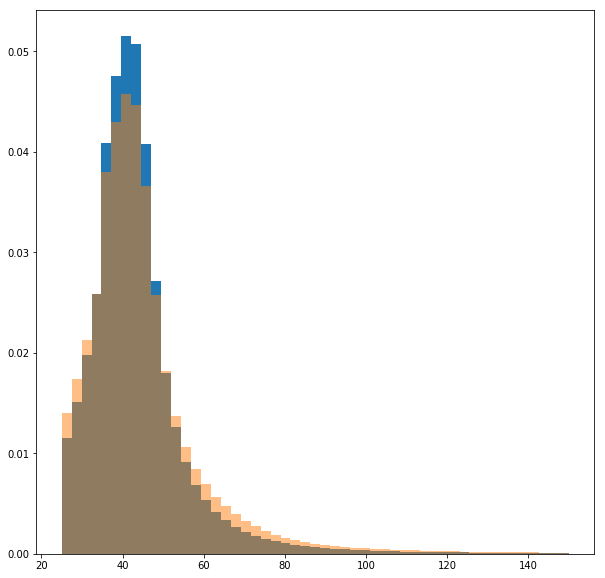

In [424]:
plt.hist(mc.Pt,weights=mc.weight,bins=51,normed=True);
plt.hist(mc.Pt,weights=np.abs(mc.weight),alpha=0.5,bins=51,normed=True);
